# Predicting Relative Humidity using Long Short-Term Memory (LSTM)

This project aims to predict outdoor relative humidity (RH) in an Italian city using Long Short-Term Memory (LSTM), a powerful type of recurrent neural network (RNN) designed to handle sequence prediction tasks. 

**Relative humidity (RH)** is the amount of moisture in the air compared to the maximum amount of moisture the air can hold at a given temperature. It is a critical parameter influencing climate, agriculture, human health, and energy consumption. By leveraging LSTM, this study explores its capability to accurately forecast RH, contributing to fields such as weather forecasting, agriculture, and energy efficiency planning.

## Dataset and References
- **Dataset**: The dataset used for this study can be found at [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/360/air+quality).
- **Paper Reference**: For detailed methodology and findings, refer to [Outdoor Relative Humidity Prediction via Machine Learning Techniques](http://www.jeiletters.org/index.php?journal=mys&page=article&op=view&path%5B%5D=202100074).

## Motivation
In today's data-driven world, accurate prediction of RH is crucial for various applications including agriculture, health, and climate adaptation. LSTM, known for its ability to model sequential data effectively, offers a promising approach to capture the temporal dependencies in RH data.

## Methodology
This study focuses solely on the Long Short-Term Memory (LSTM) model due to its superior performance in time-series prediction tasks. LSTM is chosen for its capability to learn and remember patterns over long sequences, making it ideal for forecasting RH based on historical weather data.

By implementing LSTM, this project aims to advance the understanding and predictive capabilities of RH, facilitating better planning and decision-making in various sectors reliant on climate and environmental data.


---
## Dataset Information:

The dataset comprises 9358 instances of hourly averaged responses recorded by 5 metal oxide chemical sensors in an Air Quality Chemical Multisensor Device. These sensors were deployed in a highly polluted urban environment at road level within an Italian city. Data were collected from March 2004 to February 2005, making it the longest publicly available dataset from such sensors in real-world conditions. Ground truth concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx), and Nitrogen Dioxide (NO2) were provided by a certified reference analyzer co-located with the sensor array. The dataset includes evidence of sensor cross-sensitivities, concept drifts, and sensor drifts, which can affect the accuracy of concentration estimations. Missing values are denoted by -200. 

This dataset is exclusively intended for research purposes and is not licensed for commercial use.

---
| Variable Name | Role       | Type         | Description                                                            | Units          | Missing Values |
|---------------|------------|--------------|------------------------------------------------------------------------|-----------------|----------------|
| Date          | Feature    | Date         | Date                                                                   | -               | no             |
| Time          | Feature    | Categorical  | Time                                                                   | -               | no             |
| CO(GT)        | Feature    | Integer      | True hourly averaged concentration CO in mg/m^3 (reference analyzer)    | mg/m^3          | no             |
| PT08.S1(CO)   | Feature    | Categorical  | Hourly averaged sensor response (nominally CO targeted)                 | -               | no             |
| NMHC(GT)      | Feature    | Integer      | True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer) | microg/m^3 | no             |
| C6H6(GT)      | Feature    | Continuous   | True hourly averaged Benzene concentration in microg/m^3 (reference analyzer) | microg/m^3 | no             |
| PT08.S2(NMHC) | Feature    | Categorical  | Hourly averaged sensor response (nominally NMHC targeted)              | -               | no             |
| NOx(GT)       | Feature    | Integer      | True hourly averaged NOx concentration in ppb (reference analyzer)      | ppb             | no             |
| PT08.S3(NOx)  | Feature    | Categorical  | Hourly averaged sensor response (nominally NOx targeted)               | -               | no             |
| NO2(GT)       | Feature    | Integer      | True hourly averaged NO2 concentration in microg/m^3 (reference analyzer) | microg/m^3 | no             |
| PT08.S4(NO2)  | Feature    | Categorical  | Hourly averaged sensor response (nominally NO2 targeted)               | -               | no             |
| PT08.S5(O3)   | Feature    | Categorical  | Hourly averaged sensor response (nominally O3 targeted)                | -               | no             |
| T             | Feature    | Continuous   | Temperature                                                            | °C              | no             |
| RH            | Feature    | Continuous   | Relative Humidity                                                      | %               | no             |
| AH            | Feature    | Continuous   | Absolute Humidity                                                      | -               | no             |


### Importing Libraries

To begin with df handling, visualization, and implementing machine learning models, we first need to import essential libraries in Python. These libraries provide functions and tools necessary for tasks such as df manipulation, visualization, and model implementation.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Loading the dfset

To start our analysis, we load the dfset from a CSV file using the `pd.read_csv` function provided by the pandas library. The dfset is stored in a file named 'AirQualityUCI.csv' located in the current directory. We also handle missing values specified as -200 by converting them to NaN (Not a Number).

In [2]:
# install ucimlrepo if not installed
# !pip install ucimlrepo

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
air_quality = fetch_ucirepo(id=360) 
  
df = air_quality.data.features 


### Exploring and Preprocessing the dfset

After loading the dfset, we proceed with several steps to explore its structure, convert df types, and handle missing values.


In [3]:
df.shape

(9357, 15)

In [4]:
df.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  3/10/2004  18:00:00     2.6         1360       150      11.9   
1  3/10/2004  19:00:00     2.0         1292       112       9.4   
2  3/10/2004  20:00:00     2.2         1402        88       9.0   
3  3/10/2004  21:00:00     2.2         1376        80       9.2   
4  3/10/2004  22:00:00     1.6         1272        51       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0           1046      166          1056      113          1692         1268   
1            955      103          1174       92          1559          972   
2            939      131          1140      114          1555         1074   
3            948      172          1092      122          1584         1203   
4            836      131          1205      116          1490         1110   

      T    RH      AH  
0  13.6  48.9  0.7578  
1  13.3  47.7  0.7255  
2  11.9  54.0  0.7502  
3  11.0  60.0  0.7867  
4  11.2  59.6  0.7888

In [5]:
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df.drop(['Date', 'Time'], axis=1, inplace=True)
df['DateTime'].head(2)

0   2004-03-10 18:00:00
1   2004-03-10 19:00:00
Name: DateTime, dtype: datetime64[ns]

---
## Missing Values
Since the dataset uses `-200` to denote missing values, we will replace all instances of `-200` with `NaN` to accurately handle these missing values in our subsequent analysis.


In [6]:
# List of columns to check for missing values
columns = df.columns

# Loop through each column and replace -200 with NaN
for column in columns:
    df[column].replace(-200, np.nan, inplace=True)

df.head()


CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0     2.6       1360.0     150.0      11.9         1046.0    166.0   
1     2.0       1292.0     112.0       9.4          955.0    103.0   
2     2.2       1402.0      88.0       9.0          939.0    131.0   
3     2.2       1376.0      80.0       9.2          948.0    172.0   
4     1.6       1272.0      51.0       6.5          836.0    131.0   

   PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  \
0        1056.0    113.0        1692.0       1268.0  13.6  48.9  0.7578   
1        1174.0     92.0        1559.0        972.0  13.3  47.7  0.7255   
2        1140.0    114.0        1555.0       1074.0  11.9  54.0  0.7502   
3        1092.0    122.0        1584.0       1203.0  11.0  60.0  0.7867   
4        1205.0    116.0        1490.0       1110.0  11.2  59.6  0.7888   

             DateTime  
0 2004-03-10 18:00:00  
1 2004-03-10 19:00:00  
2 2004-03-10 20:00:00  
3 2004-03-10 21:00:00  
4 2004-03-10 22:00:00

We need to identify and quantify missing values in a dataset or specific columns. The function below, `missing_vals`, is designed to calculate and display the number and percentage of missing values for each column in the provided DataFrame `df`. 

In [7]:
def missing_vals(df):
    total_miss_vals = df.isnull().sum()
    percent_miss_vals = (df.isnull().sum() / len(df)) * 100
    
    miss_val_dtframe = pd.concat([total_miss_vals , percent_miss_vals] , axis = 1)
    miss_val_dtframe = miss_val_dtframe.rename(columns = {0 : 'Missing Counts', 1: 'Missing %'})
    miss_val_dtframe = miss_val_dtframe[miss_val_dtframe['Missing Counts'] != 0]
    miss_val_dtframe = miss_val_dtframe.sort_values(by = 'Missing Counts' , ascending=False)
    
    print(f"{len(miss_val_dtframe)} out of {df.shape[1]} columns have missing values")
    
    return miss_val_dtframe

In [8]:
missing_vals(df)

13 out of 14 columns have missing values


Missing Counts  Missing %
NMHC(GT)                 8443  90.231912
CO(GT)                   1683  17.986534
NO2(GT)                  1642  17.548360
NOx(GT)                  1639  17.516298
PT08.S1(CO)               366   3.911510
C6H6(GT)                  366   3.911510
PT08.S2(NMHC)             366   3.911510
PT08.S3(NOx)              366   3.911510
PT08.S4(NO2)              366   3.911510
PT08.S5(O3)               366   3.911510
T                         366   3.911510
RH                        366   3.911510
AH                        366   3.911510

### Handling Missing Values in Time Series Data

When dealing with time series data, it's crucial to handle missing values effectively to maintain the integrity and accuracy of sequential observations. 

For time series data, missing values can be filled using methods such as forward fill (using the last observed value to fill missing values) or interpolation (estimating missing values based on existing data points). These methods preserve the temporal order of data and are suitable for sequential observations.

Here's how you can handle missing values and drop the 'NMHC(GT)' column due to a high number of missing values using the forward fill (ffill) method in Python:


In [9]:
df.drop(['NMHC(GT)'] ,axis = 1 ,  inplace = True)

In [10]:
# Replace missing values with forward fill method
df.fillna(method='ffill', inplace=True)

# Verify if there are any remaining missing values
print("Missing values count after handling:")

missing_values_after = missing_vals(df)
print(missing_values_after)

Missing values count after handling:
0 out of 13 columns have missing values
Empty DataFrame
Columns: [Missing Counts, Missing %]
Index: []


### Purpose of the Graphs

The first set of graphs provides a time series plot for each feature, illustrating the trends and patterns over the recorded period. The second set of graphs consists of histograms for each feature, showing the distribution and frequency of the recorded values.

These visualizations help in understanding the temporal behavior and overall distribution of the data, which are crucial for further analysis and modeling.


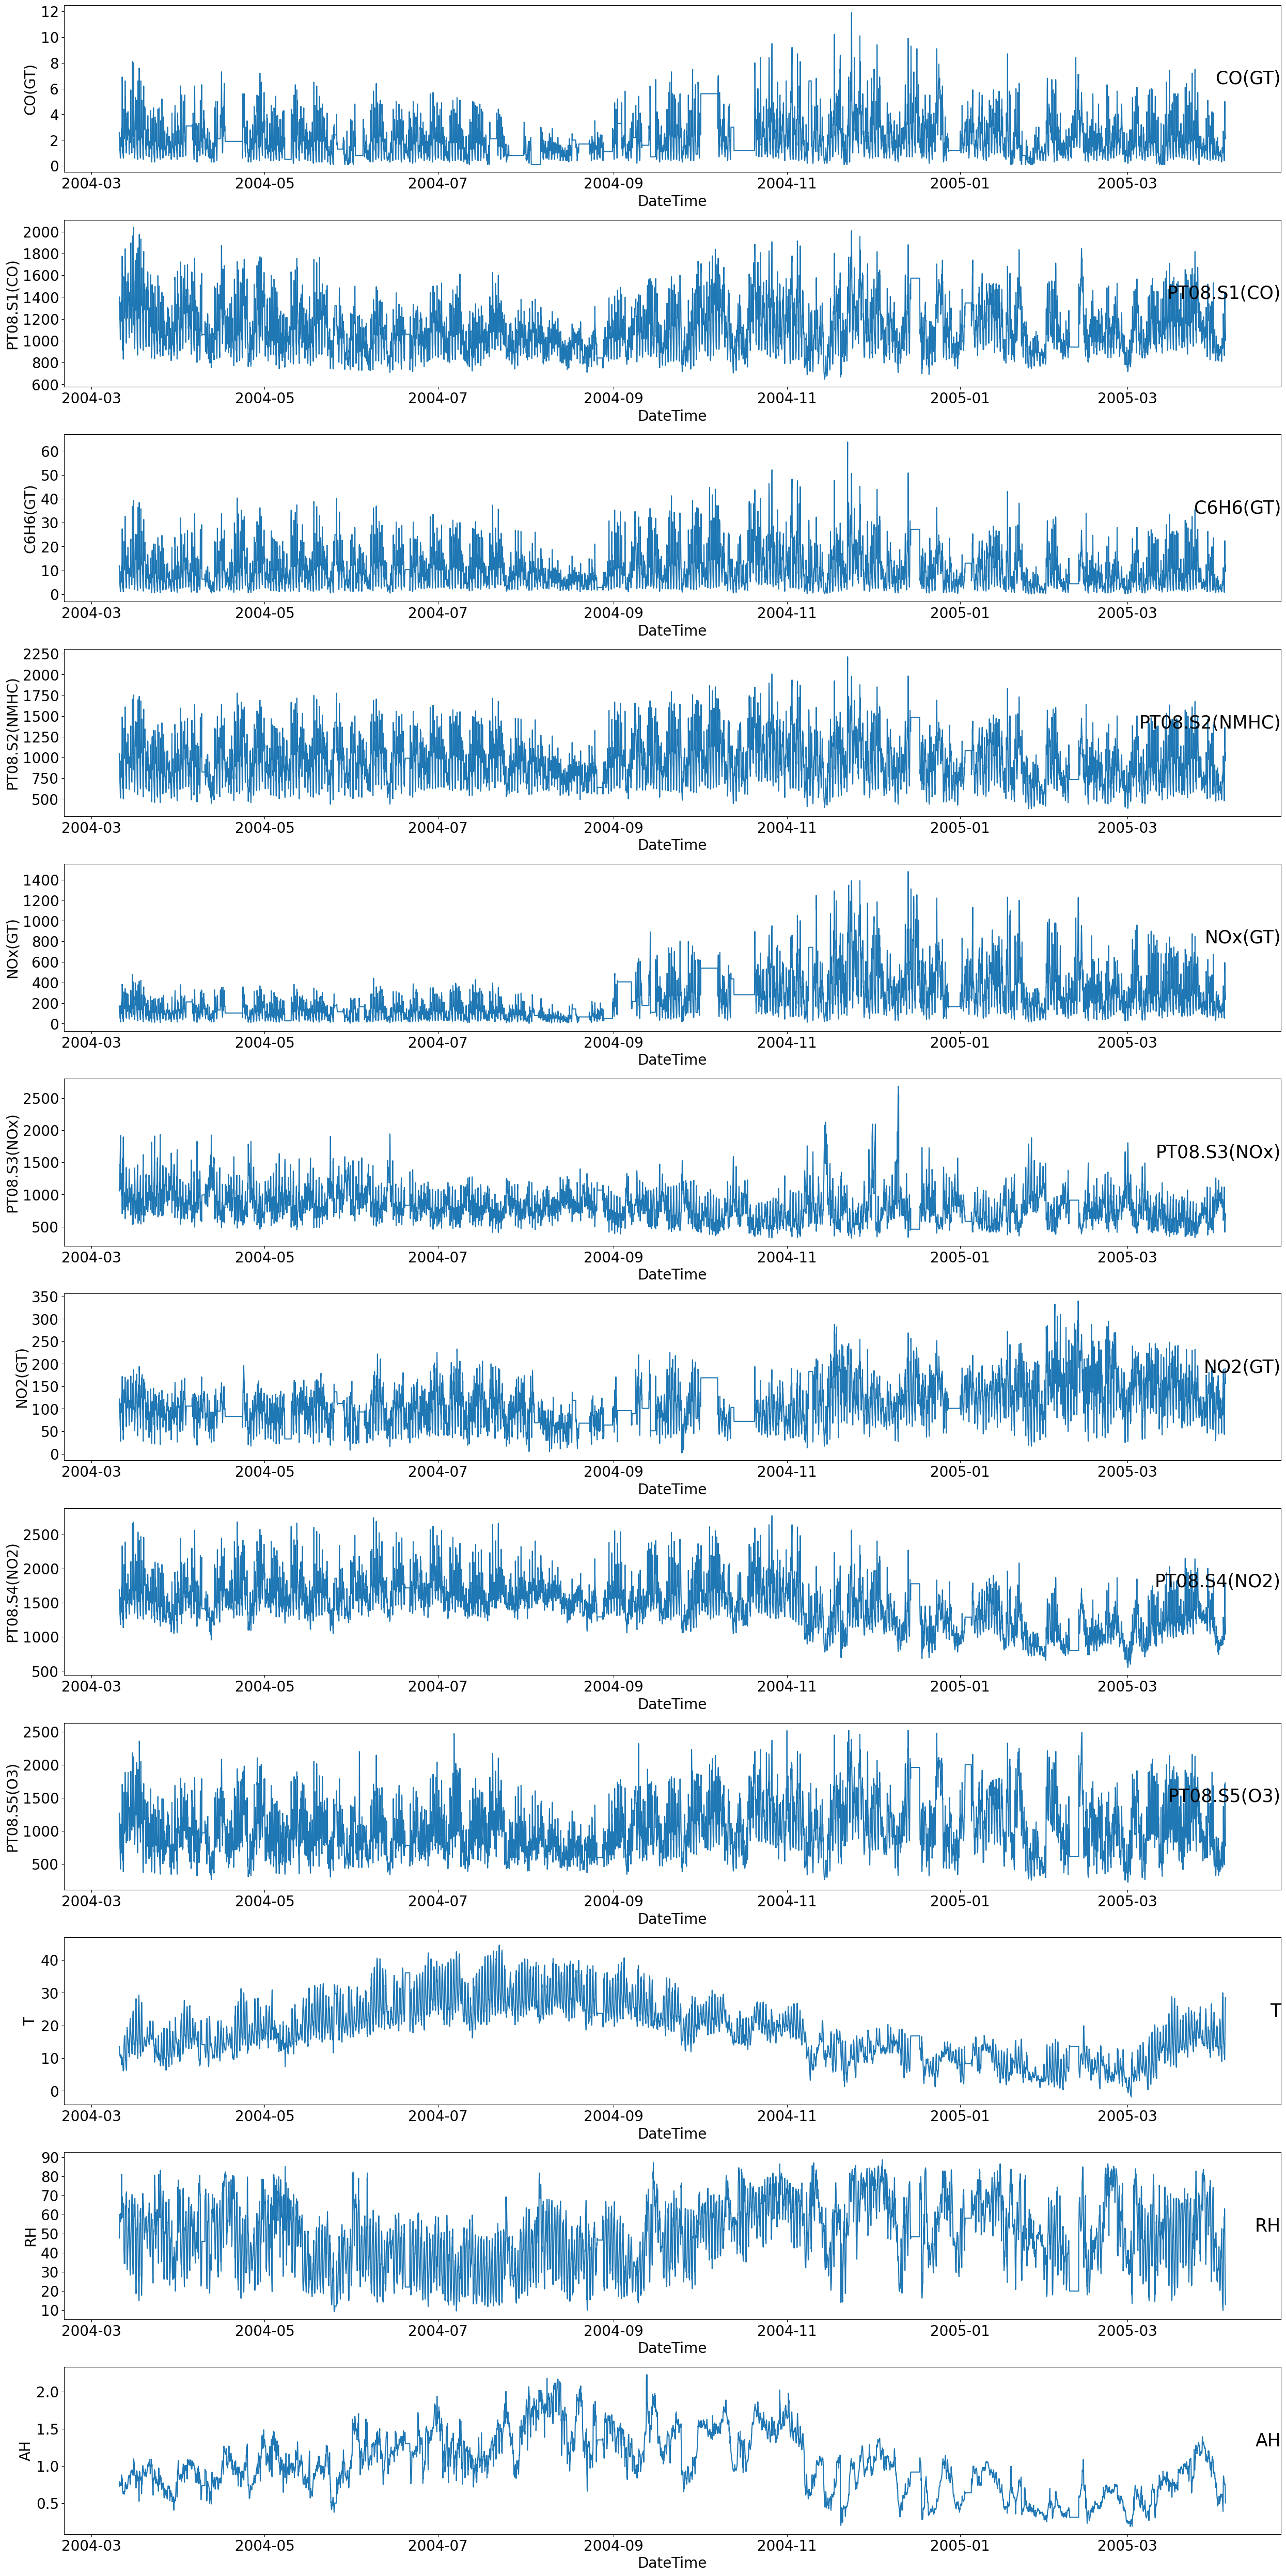

In [11]:
# Get column names except for the last column ('Date')
groups = df.columns[:-1]  # Exclude the last column assuming it's 'Date'

plt.figure(figsize=(25, 50))

# Iterate over each column and plot
for i, group in enumerate(groups, start=1):
    plt.subplot(len(groups), 1, i)
    plt.plot(df['DateTime'], df[group])
    plt.title(group, y=0.5, loc='right', fontsize=25)
    plt.xlabel('DateTime', fontsize=20)  
    plt.ylabel(group, fontsize=20)       
    plt.xticks(fontsize=20)              
    plt.yticks(fontsize=20)             

plt.tight_layout()
plt.show()

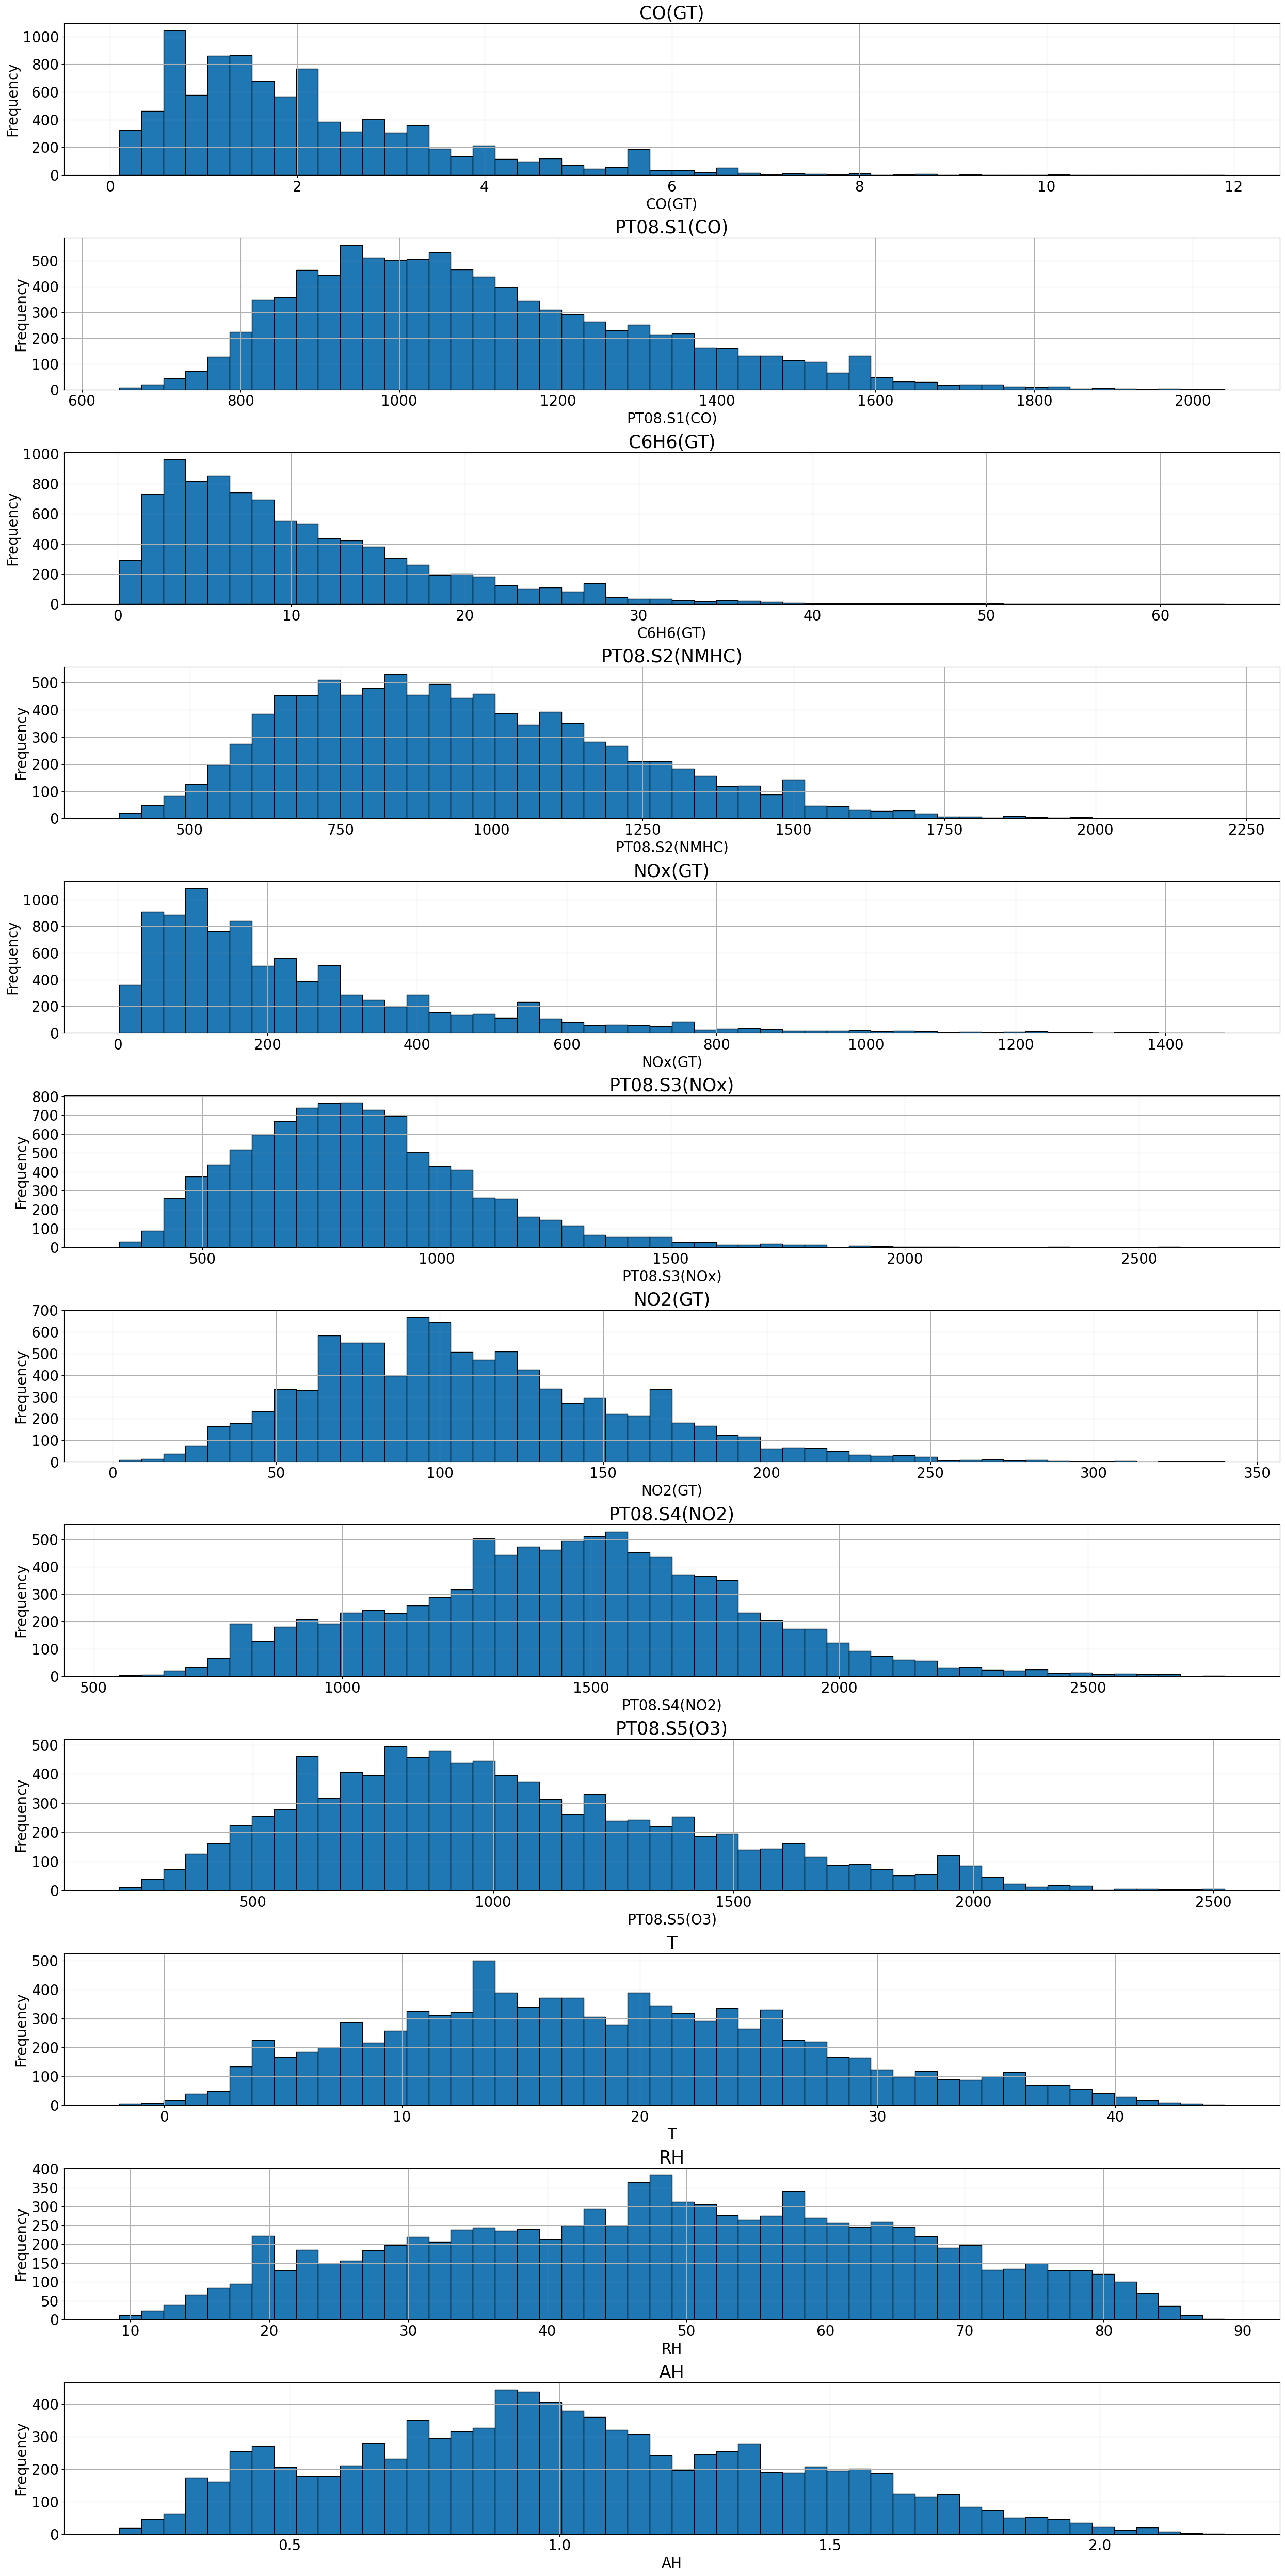

In [12]:
plt.figure(figsize=(25, 50))

# Iterate over each column and plot histogram
for i, group in enumerate(groups, start=1):
    plt.subplot(len(groups), 1, i)
    df[group].hist(bins=50 , edgecolor='black')
    plt.title(group, fontsize=25)
    plt.xlabel(group, fontsize=20)
    plt.ylabel('Frequency', fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

plt.tight_layout()
plt.show()

---
## Data Types Distribution

We aim to understand the distribution of data types across columns in the dataset. 

In [13]:
dtype_counts = df.dtypes.value_counts()
print(dtype_counts)

float64           12
datetime64[ns]     1
dtype: int64



## Correlations

After addressing categorical variables and outliers, we continue with Exploratory Data Analysis (EDA) by examining correlations between features and the target variable. We will calculate the Pearson correlation coefficient using the `.corr()` method on the DataFrame.

The Pearson correlation coefficient provides insight into potential relationships between variables and the target. While it's not a definitive measure of feature relevance, it helps identify possible associations within the dataset.

### Interpretation of Pearson Correlation Coefficient

- **0.00 to 0.19**: Very weak correlation
- **0.20 to 0.39**: Weak correlation
- **0.40 to 0.59**: Moderate correlation
- **0.60 to 0.79**: Strong correlation
- **0.80 to 1.0**: Very strong correlation

These ranges categorize the strength of linear relationships as indicated by the Pearson correlation coefficient.

In [14]:
sns.set(style="white")

corr = df.corr()
corr['RH'].sort_values()

T               -0.570775
NO2(GT)         -0.098619
PT08.S2(NMHC)   -0.082087
PT08.S3(NOx)    -0.060581
C6H6(GT)        -0.054949
PT08.S4(NO2)    -0.015158
CO(GT)           0.041975
PT08.S1(CO)      0.120042
PT08.S5(O3)      0.137821
AH               0.180512
NOx(GT)          0.184418
RH               1.000000
Name: RH, dtype: float64

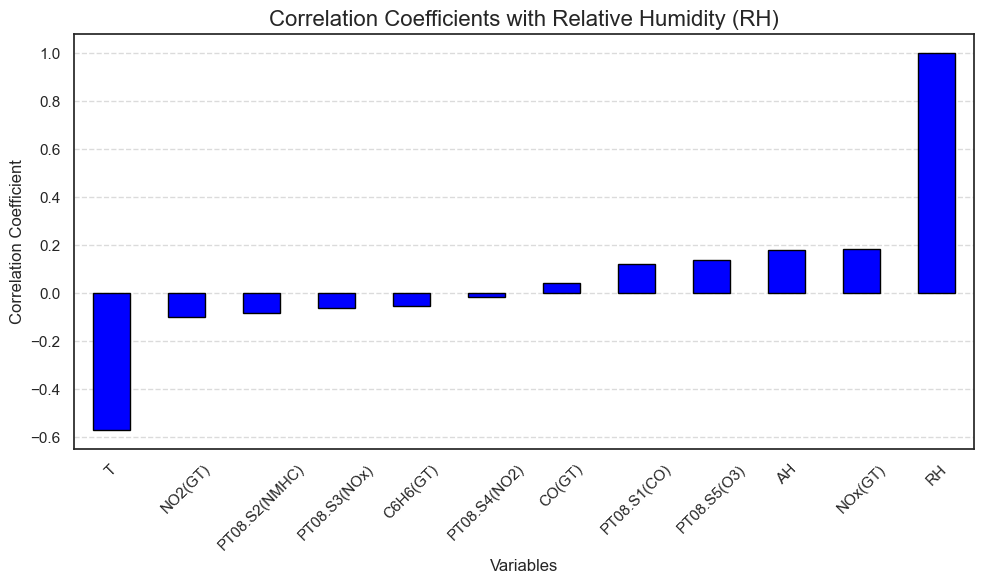

In [15]:
plt.figure(figsize=(10, 6))

# Plot the bar graph for correlation coefficients with RH
bar = df.corr()['RH'].sort_values()
bar.plot(kind='bar', color='blue', edgecolor='black')  # Add edgecolor parameter for edges

# Customize the plot
plt.title('Correlation Coefficients with Relative Humidity (RH)', fontsize=16)
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**- Negative Correlations:**
  - T (Temperature): Moderate negative correlation (-0.570775), indicating as temperature increases, RH tends to decrease.
  - NO2(GT) (Nitrogen Dioxide): Weak negative correlation (-0.098619), higher NO2(GT) associated with slightly lower RH.
  - PT08.S2(NMHC) (Tin Oxide): Very weak negative correlation (-0.082087) with RH.
  - PT08.S3(NOx) (Tungsten Oxide): Weak negative correlation (-0.060581) with RH.

**- Positive Correlations:**
  - AH (Absolute Humidity): Moderate positive correlation (0.180512), higher AH associated with higher RH.
  - NOx(GT) (Nitrogen Oxides): Moderate positive correlation (0.184418), higher NOx(GT) associated with higher RH.
  - PT08.S5(O3) (Indium Oxide): Weak positive correlation (0.137821) with RH.
  - PT08.S1(CO) (Tin Oxide): Weak positive correlation (0.120042) with RH.

- Weak or Minimal Correlations:
  - C6H6(GT) (Benzene), PT08.S4(NO2) (Tungsten Oxide), CO(GT) (Carbon Monoxide): Little to no correlation with RH.



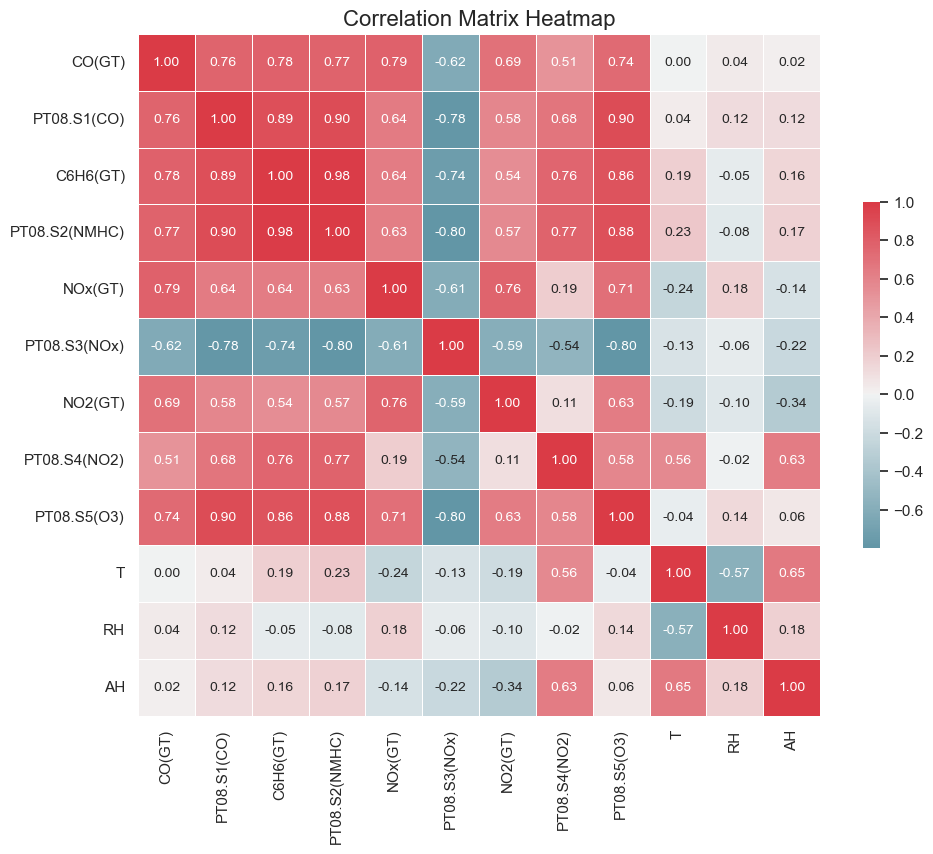

In [16]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the correct aspect ratio, including annotations
sns.heatmap(corr, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot=True, fmt=".2f", annot_kws={"size": 10})

plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

### Histogram of Relative Humidity (RH)

To visualize the distribution of Relative Humidity (RH) values in your dataset, you can create a histogram using matplotlib. Here's how to plot it:



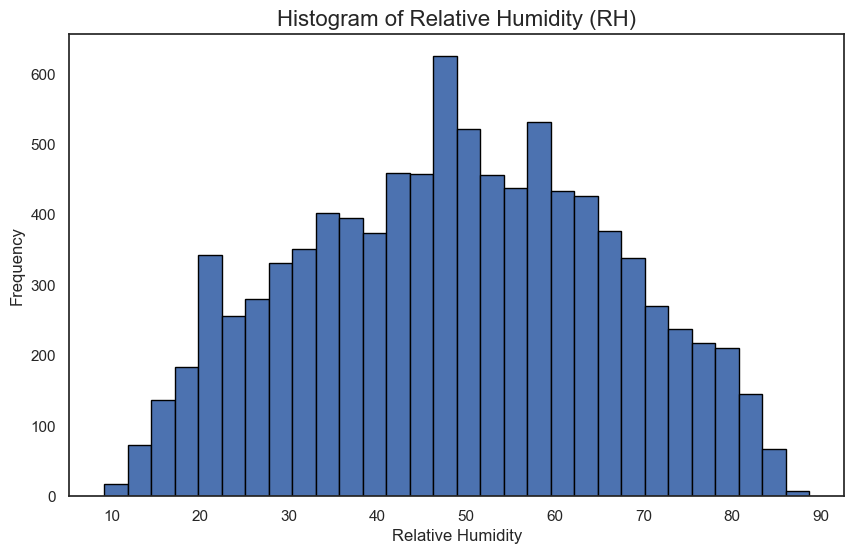

In [17]:
plt.figure(figsize=(10, 6))

# Plot the histogram for RH
(df['RH']).plot.hist(bins=30, edgecolor='black')

# Customize the plot
plt.title('Histogram of Relative Humidity (RH)', fontsize=16)
plt.xlabel('Relative Humidity')
plt.ylabel('Frequency')

# Display the plot
plt.show()

In [18]:
df = df[['T', 'NO2(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'C6H6(GT)', 'PT08.S4(NO2)', 'CO(GT)', 'PT08.S1(CO)', 'PT08.S5(O3)', 'AH', 'NOx(GT)', 'RH']]

# Understanding LSTM (Long Short-Term Memory) Networks

## Introduction to LSTM

Imagine you are observing the weather. To predict the weather tomorrow, you need to remember what the weather was like in the past few days. Similarly, when computers try to understand sequences of data (like weather patterns), they need a way to remember important things from earlier in the sequence. This is where LSTM networks come in!

## What is LSTM?

LSTM stands for Long Short-Term Memory. It is a type of Recurrent Neural Network (RNN). RNNs are a kind of neural network designed to handle sequential data, where the order of the data points matters. However, regular RNNs struggle with remembering information over long sequences because they tend to forget things quickly. LSTMs were created to solve this problem by allowing the network to remember important information for longer periods.

## How Does LSTM Work?

1. **Cells and Gates**:
   - Think of an LSTM as a series of cells. Each cell has gates that control the flow of information.
   - There are three main gates: **Input Gate**, **Forget Gate**, and **Output Gate**.

2. **Input Gate**:
   - This gate decides what new information will be stored in the cell.
   - It looks at the current input and the previous hidden state (like memory) to make this decision.

3. **Forget Gate**:
   - This gate decides what information from the cell should be thrown away or "forgotten".
   - It also looks at the current input and the previous hidden state.

4. **Output Gate**:
   - This gate decides what information from the cell should be output (or used) at the current step.
   - Again, it uses the current input and the previous hidden state.

## Why is LSTM Special?

LSTM networks are special because they can remember important information for a long time and ignore unnecessary details. This makes them very useful for tasks where understanding the context over time is important, like language translation, speech recognition, and time series prediction.

## Example: Predicting Relative Humidity

Imagine you are predicting relative humidity, which measures how much moisture is in the air compared to how much the air can hold at a certain temperature. To predict tomorrow's relative humidity, you need to remember the temperature and humidity levels from the past few days. If you forget this information, your prediction won't be accurate. LSTM networks help computers do something similar—they remember important parts of the data sequence to make better predictions about things like weather patterns.

For example, if it has been very humid for the past few days, an LSTM can learn this pattern and use it to predict that it might continue to be humid tomorrow. It can also remember that humidity tends to be higher in the mornings and lower in the afternoons, using this pattern to make more accurate predictions.



## Applying LSTM with Two Methods for Time Series Prediction

In this example, we employ two distinct methods to prepare our data and train an LSTM (Long Short-Term Memory) model for predicting relative humidity (`RH`). Each method serves a unique purpose in organizing the data for effective learning by the LSTM model.

### Method 1: Sequence Creation Method

**Purpose:** Method 1 focuses on organizing the dataset into sequences that capture temporal dependencies, allowing the LSTM model to learn patterns over time.

**Explanation:**
Method 1 begins by scaling the dataset using Min-Max scaling to normalize all variables to a common range. This preprocessing step ensures that each variable contributes equally to the learning process without biases from different data scales. The dataset, containing variables such as temperature (`T`), nitrogen dioxide levels (`NO2(GT)`), and others, is then segmented into sequences of a specified length (`sequence_length`). Each sequence comprises a set of past observations of these variables, excluding `RH`, which serves as the target for prediction. These sequences are split into training and testing sets to evaluate the model's performance. Data is reshaped into a three-dimensional format (`[samples, timesteps, features]`), where each sample represents a sequence of historical data points, each with multiple features. An LSTM model is constructed using Keras, with layers designed to retain memory of previous inputs and predict the next `RH` value based on learned patterns from historical data.

### Method 2: Supervised Learning Method

**Purpose:** Method 2 transforms the dataset into a supervised learning problem suitable for training an LSTM model, focusing on feature engineering and target prediction.

**Explanation:**
Method 2 involves transforming the original dataset into a supervised learning format, where each instance is represented by a set of input features (lagged values of variables up to a specified number of time steps) and a corresponding target output (`RH` value). This transformation is facilitated by a function that shifts the dataset to create lagged input features (`X`) and the current or future `RH` value as the target (`y`). Similar to Method 1, the dataset undergoes Min-Max scaling to normalize values and ensure consistent learning across different variables. The transformed dataset is split into training and testing subsets, and then reshaped into the necessary three-dimensional format (`[samples, timesteps, features]`) for LSTM input. A Sequential LSTM model is constructed and trained using the training data, with layers configured to learn from historical sequences of input features to predict `RH` accurately. Model training evaluates its performance on the testing set to assess its ability to generalize and predict `RH` values effectively.


### Method 1

In [19]:
# Method 1: create_sequences function
def create_sequences_meth1(data, target_col, sequence_length=10):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length].drop(columns=[target_col]).values
        label = data.iloc[i + sequence_length][target_col]
        sequences.append(seq)
        targets.append(label)
    return np.array(sequences), np.array(targets)

This code creates a function that generates sequences of data for a machine learning model. It takes a dataset (`data`), specifies a target column (`target_col`), and a sequence length (defaulting to 10). This function loops through the dataset to create sequences of length `sequence_length` minus one, dropping the `target_col` from each sequence. It then collects these sequences (`sequences`) and their corresponding target values (`targets`) from the dataset. Finally, it returns these sequences and targets as arrays.


In [20]:
scaler_meth1 = MinMaxScaler()
scaled_df_meth1 = pd.DataFrame(scaler_meth1.fit_transform(df), columns=df.columns)

sequence_length = 100
num_features = len(df.columns)

X_meth1, y_meth1 = create_sequences_meth1(scaled_df_meth1, target_col='RH', sequence_length=sequence_length)

Scaling the data using a method called MinMaxScaler transforms each feature in the dataset (`df`) to a specified range (usually between 0 and 1). After scaling, sequences of data (`X_meth1`) and their corresponding target values (`y_meth1`) are created. These sequences are generated with a length of 100 and are based on the scaled data (`scaled_df_meth1`), excluding the 'RH' column as the target variable.


In [21]:
split_ratio = 0.8
split_index = int(len(X_meth1) * split_ratio)

X_train_meth1, X_test_meth1 = X_meth1[:split_index], X_meth1[split_index:]
y_train_meth1, y_test_meth1 = y_meth1[:split_index], y_meth1[split_index:]

X_train_meth1 = X_train_meth1.reshape((X_train_meth1.shape[0], X_train_meth1.shape[1], X_train_meth1.shape[2]))
X_test_meth1 = X_test_meth1.reshape((X_test_meth1.shape[0], X_test_meth1.shape[1], X_test_meth1.shape[2]))

To split the sequences of data (`X_meth1`) and their corresponding target values (`y_meth1`) into training and testing sets, we determine a split ratio of 0.8. This ratio means 80% of the data will be used for training (`X_train_meth1`, `y_train_meth1`), and 20% for testing (`X_test_meth1`, `y_test_meth1`). 

The sequences for training and testing are reshaped to a three-dimensional format to fit into a recurrent neural network (RNN) or a similar model. This reshaping is necessary because these models expect input data in the form of [samples, time steps, features].


In [22]:
optimizer_meth1 = Adam(lr=0.001)
model_meth1 = Sequential()
model_meth1.add(LSTM(32, return_sequences=True, input_shape=(X_train_meth1.shape[1], X_train_meth1.shape[2])))
model_meth1.add(Dropout(0.2))
model_meth1.add(LSTM(32))
model_meth1.add(Dropout(0.2))
model_meth1.add(Dense(1))
model_meth1.compile(loss='mse', optimizer=optimizer_meth1, metrics=['mse'])

early_stopping_meth1 = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history_meth1 = model_meth1.fit(X_train_meth1, y_train_meth1, epochs=200, batch_size=50, 
                                validation_data=(X_test_meth1, y_test_meth1), verbose=0, 
                                callbacks=[early_stopping_meth1], shuffle=False)

Setting up a machine learning model involves using an optimizer called Adam, which adjusts the model's parameters during training to minimize errors. The model architecture includes two LSTM layers, types of recurrent neural networks (RNNs) suitable for sequence prediction tasks. Each LSTM layer has 32 units, and dropout is applied to prevent overfitting by randomly ignoring connections during training.

The model is compiled to minimize the mean squared error (`mse`) and uses Adam optimizer with a learning rate (`lr`) of 0.001. It also tracks the mean squared error (`mse`) as a metric during training.

An early stopping mechanism (`early_stopping_meth1`) halts training if the validation loss (`val_loss`) does not improve after 10 epochs, restoring the best weights observed during training.

Training (`model_meth1.fit`) is conducted for up to 200 epochs with a batch size of 50, using the training data (`X_train_meth1`, `y_train_meth1`). Validation data (`X_test_meth1`, `y_test_meth1`) is used to monitor performance during training without affecting model parameters.



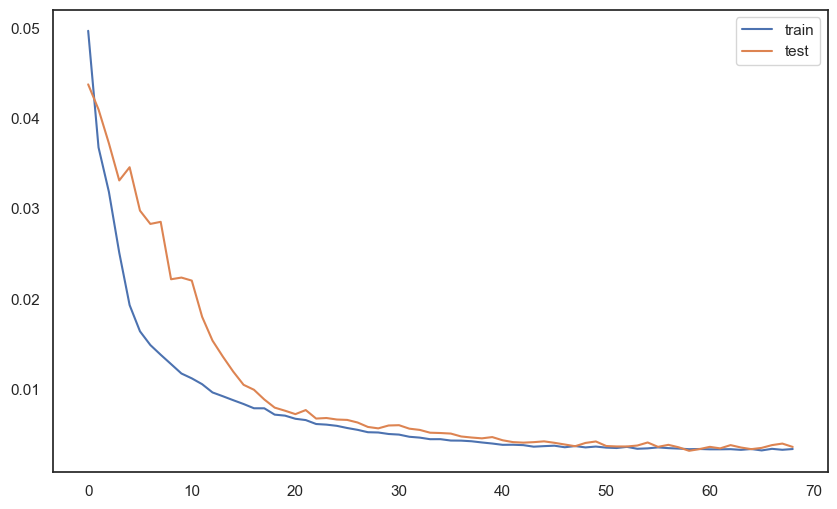

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(history_meth1.history['loss'], label='train')
plt.plot(history_meth1.history['val_loss'], label='test')
plt.legend()
plt.show()

This code visualizes the training progress of the machine learning model. The plot displays how the loss, which measures the difference between predicted and actual values, changes over epochs. The 'train' line represents the loss on the training data, while the 'test' line shows the loss on the validation data (which was not used for training). The goal is to observe how well the model learns from the training data and generalizes to new, unseen data (validation set).

The training and validation loss trends show the model's learning progress over epochs. Initially, both training and validation losses decrease steadily, indicating the model is improving its ability to predict on seen and unseen data. Around epoch 20, both losses stabilize and continue to decrease gradually, with occasional fluctuations. Towards the end of training, the validation loss consistently remains lower than the training loss, suggesting the model generalizes well to new data. Overall, the decreasing trend in both losses indicates that the model is effectively learning from the training data and performing well on the validation set.

In [24]:
predictions_meth1 = model_meth1.predict(X_test_meth1)
X_test_reshaped_meth1 = X_test_meth1.reshape((X_test_meth1.shape[0], X_test_meth1.shape[1] * X_test_meth1.shape[2]))

inv_preds_meth1 = np.concatenate((predictions_meth1, X_test_reshaped_meth1[:, -(num_features - 1):]), axis=1)
inv_preds_meth1 = scaler_meth1.inverse_transform(inv_preds_meth1)
inv_preds_meth1 = inv_preds_meth1[:, 0]

y_test_reshaped_meth1 = y_test_meth1.reshape((len(y_test_meth1), 1))
inv_actual_y_meth1 = np.concatenate((y_test_reshaped_meth1, X_test_reshaped_meth1[:, -(num_features - 1):]), axis=1)
inv_actual_y_meth1 = scaler_meth1.inverse_transform(inv_actual_y_meth1)
inv_actual_y_meth1 = inv_actual_y_meth1[:, 0]

print("Predictions Method 1:", inv_preds_meth1)
print("Actual values Method 1:", inv_actual_y_meth1)

58/58 [==============================] - 1s 13ms/step
Predictions Method 1: [20.72510315 13.99930025 11.20439576 ...  2.88401567  0.74950135
 -0.53083279]
Actual values Method 1: [16.40754717 13.01509434 12.19622642 ...  3.42264151  0.61509434
  0.38113208]


The code snippet above demonstrates how to transform the model's predictions (`predictions_meth1`) and actual target values (`y_test_meth1`) back to their original scale after scaling them for model training. First, predictions and the test data (`X_test_meth1`) are reshaped appropriately. Then, predictions are combined with the corresponding scaled features that were dropped during preprocessing. The combined array (`inv_preds_meth1`) is inverted using the `scaler_meth1.inverse_transform` method to revert the scaling applied earlier. The process ensures predictions are in the original measurement scale of the dataset. Similarly, the actual target values (`inv_actual_y_meth1`) are transformed back to their original scale for comparison with predictions. This step allows us to assess the model's performance in terms of how closely its predictions align with the actual values from the dataset.


In [25]:
# Evaluate Method 1
mse_meth1 = mean_squared_error(inv_actual_y_meth1, inv_preds_meth1)
rmse_meth1 = np.sqrt(mse_meth1)
r2_meth1 = r2_score(inv_actual_y_meth1, inv_preds_meth1)
mae_meth1 = mean_absolute_error(inv_actual_y_meth1, inv_preds_meth1)

print(f'Method 1 - Mean Squared Error (MSE): {mse_meth1}')
print(f'Method 1 - Root Mean Squared Error (RMSE): {rmse_meth1}')
print(f'Method 1 - R-squared (R2): {r2_meth1}')
print(f'Method 1 - Mean Absolute Error (MAE): {mae_meth1}')

Method 1 - Mean Squared Error (MSE): 6.851774623441025
Method 1 - Root Mean Squared Error (RMSE): 2.617589468087199
Method 1 - R-squared (R2): 0.9328422940803206
Method 1 - Mean Absolute Error (MAE): 1.8842330539870726


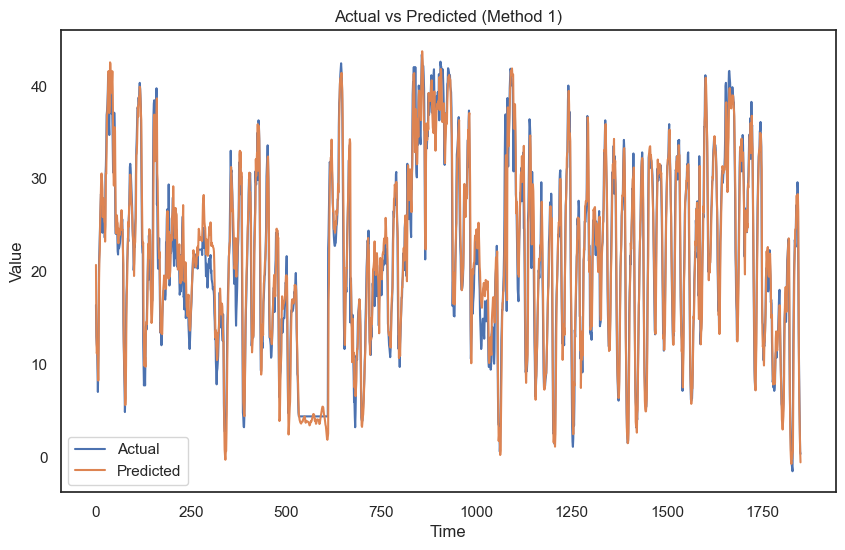

In [26]:
# Visualize actual vs predicted for Method 1
plt.figure(figsize=(10, 6))
plt.plot(inv_actual_y_meth1, label='Actual')
plt.plot(inv_preds_meth1, label='Predicted')
plt.title('Actual vs Predicted (Method 1)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

### Method 2

In [27]:
# Method 2: making_supervised function
def making_supervised_meth2(data, number_input=1, number_output=1, dropnan=True):
    number_variables = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(number_input, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(number_variables)]
    for i in range(0, number_output):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(number_variables)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(number_variables)]
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    if dropnan:
        agg.dropna(inplace=True)
    return agg

We are defining a function called `making_supervised_meth2` that prepares data for supervised learning tasks by creating a new dataset where each row is shifted to include past and future values of variables. It takes input data (`data`) and parameters (`number_input`, `number_output`, `dropnan`) to determine the structure of the new dataset. The function shifts the data to create lag observations (`var(t-n)`) as input features and includes future observations (`var(t)`) as output targets. This process organizes the data into a supervised learning format suitable for training predictive models, such as regression or neural networks.


In [28]:
scaler_meth2 = MinMaxScaler()
scaled_values_meth2 = scaler_meth2.fit_transform(df.values)
scaled_df_meth2 = pd.DataFrame(scaled_values_meth2, columns=df.columns)

In [29]:
number_input = 100
number_output = 1
reframed_meth2 = making_supervised_meth2(scaled_df_meth2, number_input, number_output)
target_col_index = len(df.columns) * number_input

drop_columns = [i for i in range(target_col_index, reframed_meth2.shape[1]) if (i - target_col_index) % len(df.columns) != len(df.columns) - 1]
reframed_meth2.drop(reframed_meth2.columns[drop_columns], axis=1, inplace=True)
values_meth2 = reframed_meth2.values
n_train_hours = int(len(values_meth2) * 0.8)
train_meth2 = values_meth2[:n_train_hours, :]
test_meth2 = values_meth2[n_train_hours:, :]

X_train_meth2, y_train_meth2 = train_meth2[:, :-1], train_meth2[:, -1]
X_test_meth2, y_test_meth2 = test_meth2[:, :-1], test_meth2[:, -1]

X_train_meth2 = X_train_meth2.reshape((X_train_meth2.shape[0], number_input, len(df.columns)))
X_test_meth2 = X_test_meth2.reshape((X_test_meth2.shape[0], number_input, len(df.columns)))

In this code block, we are preparing the data (`scaled_df_meth2`) for a supervised learning task using a function called `making_supervised_meth2`. This function structures the data into input-output pairs suitable for training models. 

First, we set `number_input` to 100 and `number_output` to 1, specifying how many previous time steps (`number_input`) to use as input features and how many future time steps (`number_output`) to predict. The function `making_supervised_meth2` reshapes the data accordingly, creating a dataset (`reframed_meth2`) where each row includes past observations as inputs and the next observation as the output.

Next, we determine the index of the target column (`target_col_index`) in the dataset. We drop columns from `reframed_meth2` that correspond to future values beyond the single output (`number_output`), ensuring only relevant features are kept for modeling.

The data is split into training and testing sets (`train_meth2` and `test_meth2`) based on an 80-20 split (`n_train_hours`). These sets are further divided into input features (`X_train_meth2`, `X_test_meth2`) and target values (`y_train_meth2`, `y_test_meth2`). Finally, the input features are reshaped into three-dimensional arrays suitable for feeding into a recurrent neural network or similar model structure.


In [30]:
optimizer_meth2 = Adam(lr=0.001)
model_meth2 = Sequential()
model_meth2.add(LSTM(64, return_sequences=True, input_shape=(X_train_meth2.shape[1], X_train_meth2.shape[2])))
model_meth2.add(Dropout(0.2))
model_meth2.add(LSTM(64))
model_meth2.add(Dropout(0.2))
model_meth2.add(Dense(1))
model_meth2.compile(loss='mse', optimizer=optimizer_meth2, metrics=['mse'])

early_stopping_meth2 = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history_meth2 = model_meth2.fit(X_train_meth2, y_train_meth2, epochs=200, batch_size=50, 
                                validation_data=(X_test_meth2, y_test_meth2), verbose=0, 
                                callbacks=[early_stopping_meth2], shuffle=False)

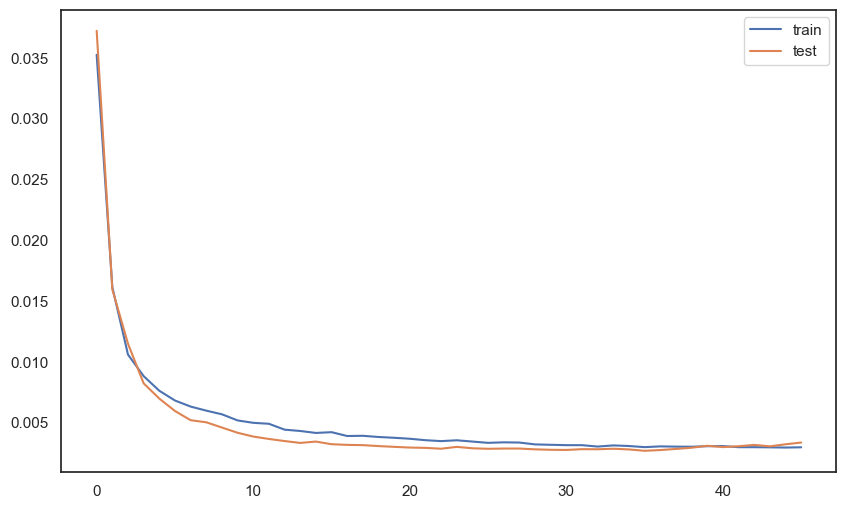

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(history_meth2.history['loss'], label='train')
plt.plot(history_meth2.history['val_loss'], label='test')
plt.legend()
plt.show()

The training and validation loss trends for `history_meth2` show the model's progression during training epochs. Initially, both training and validation losses decrease sharply, indicating rapid learning and adaptation to the data. As training continues, the decrease in loss slows down but remains consistent, demonstrating the model's ability to generalize well to unseen data. Towards the end of training, both losses stabilize at low values, with the validation loss consistently lower than the training loss, suggesting effective model training without overfitting. Overall, the decreasing trend in both training and validation losses indicates that the model learns well from the input-output structured data prepared by `making_supervised_meth2`, achieving good performance on both training and validation datasets.


In [32]:
predictions_meth2 = model_meth2.predict(X_test_meth2)
X_test_reshaped_meth2 = X_test_meth2.reshape((X_test_meth2.shape[0], number_input * len(df.columns)))

inv_preds_meth2 = np.concatenate((predictions_meth2, X_test_reshaped_meth2[:, -(len(df.columns) - 1):]), axis=1)
inv_preds_meth2 = scaler_meth2.inverse_transform(inv_preds_meth2)
inv_preds_meth2 = inv_preds_meth2[:, 0]

y_test_reshaped_meth2 = y_test_meth2.reshape((len(y_test_meth2), 1))
inv_actual_y_meth2 = np.concatenate((y_test_reshaped_meth2, X_test_reshaped_meth2[:, -(len(df.columns) - 1):]), axis=1)
inv_actual_y_meth2 = scaler_meth2.inverse_transform(inv_actual_y_meth2)
inv_actual_y_meth2 = inv_actual_y_meth2[:, 0]

print("Predictions Method 2:", inv_preds_meth2)
print("Actual values Method 2:", inv_actual_y_meth2)

58/58 [==============================] - 2s 20ms/step
Predictions Method 2: [20.05376787 13.37555639 11.81537217 ...  4.66319288  1.91325717
 -0.3942143 ]
Actual values Method 2: [16.40754717 13.01509434 12.19622642 ...  3.42264151  0.61509434
  0.38113208]


In [33]:
# Evaluate Method 2
mse_meth2 = mean_squared_error(inv_actual_y_meth2, inv_preds_meth2)
rmse_meth2 = np.sqrt(mse_meth2)
r2_meth2 = r2_score(inv_actual_y_meth2, inv_preds_meth2)
mae_meth2 = mean_absolute_error(inv_actual_y_meth2, inv_preds_meth2)

print(f'Method 2 - Mean Squared Error (MSE): {mse_meth2}')
print(f'Method 2 - Root Mean Squared Error (RMSE): {rmse_meth2}')
print(f'Method 2 - R-squared (R2): {r2_meth2}')
print(f'Method 2 - Mean Absolute Error (MAE): {mae_meth2}')

Method 2 - Mean Squared Error (MSE): 5.7881381678302954
Method 2 - Root Mean Squared Error (RMSE): 2.4058549764751604
Method 2 - R-squared (R2): 0.943267532535622
Method 2 - Mean Absolute Error (MAE): 1.7095511506826195


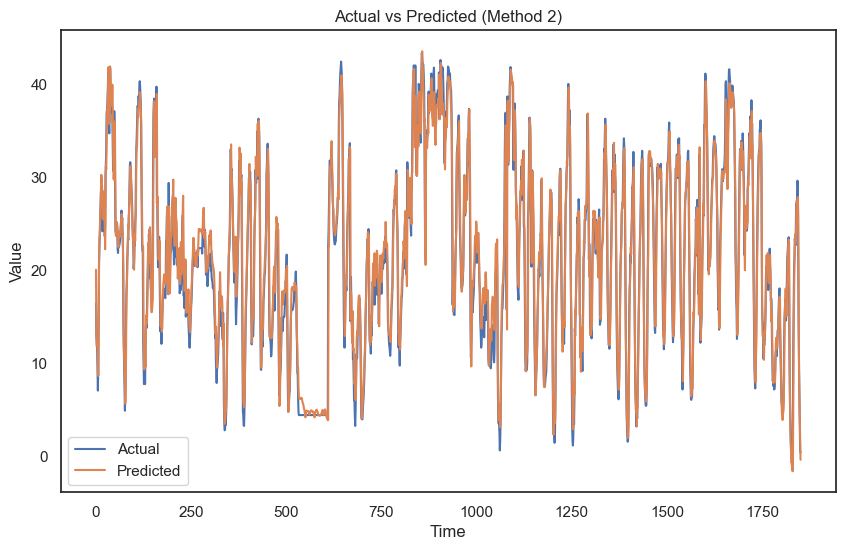

In [34]:
# Visualize actual vs predicted for Method 2
plt.figure(figsize=(10, 6))
plt.plot(inv_actual_y_meth2, label='Actual')
plt.plot(inv_preds_meth2, label='Predicted')
plt.title('Actual vs Predicted (Method 2)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

## Comparison of Methods

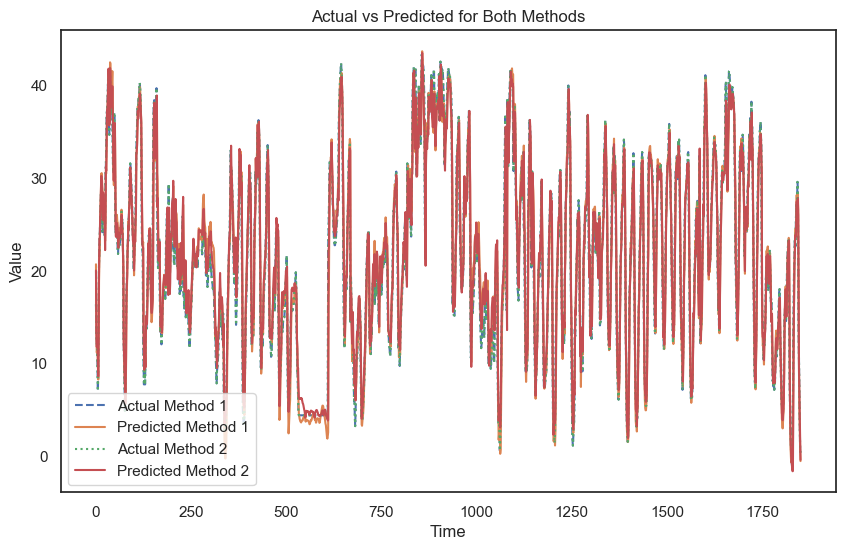

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(inv_actual_y_meth1, label='Actual Method 1', linestyle='dashed')
plt.plot(inv_preds_meth1, label='Predicted Method 1')
plt.plot(inv_actual_y_meth2, label='Actual Method 2', linestyle='dotted')
plt.plot(inv_preds_meth2, label='Predicted Method 2')
plt.title('Actual vs Predicted for Both Methods')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [36]:
# Metrics from Method 1
metrics_meth1 = {
    "MSE": mse_meth1,
    "RMSE": rmse_meth1,
    "R2": r2_meth1,
    "MAE": mae_meth1
}

# Metrics from Method 2
metrics_meth2 = {
    "MSE": mse_meth2,
    "RMSE": rmse_meth2,
    "R2": r2_meth2,
    "MAE": mae_meth2
}

# Create DataFrame for comparison
comparison_df = pd.DataFrame([metrics_meth1, metrics_meth2], index=['Method 1', 'Method 2'])

print(comparison_df)


               MSE      RMSE        R2       MAE
Method 1  6.851775  2.617589  0.932842  1.884233
Method 2  5.788138  2.405855  0.943268  1.709551


The table above presents a comparison of evaluation metrics between Method 1 and Method 2. Method 1 shows a higher Mean Squared Error (MSE) at 6.852 compared to Method 2's MSE of 5.788, indicating Method 2 performs better in terms of predicting squared differences between predicted and actual values. The Root Mean Squared Error (RMSE) follows a similar trend, with Method 2 having a lower RMSE of 2.406 compared to Method 1's 2.618. Both methods exhibit high coefficients of determination (R2), with Method 2 slightly outperforming Method 1 (0.943 vs. 0.933), suggesting that Method 2 explains a slightly larger proportion of the variance in the data. Mean Absolute Error (MAE) also shows Method 2 as having a better performance, with a lower MAE of 1.710 compared to Method 1's 1.884. Overall, Method 2 demonstrates superior performance across all metrics.
